In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [18]:
"""
Remember: to do polynomial regression (e.g. y ~ Ax^2 + Bx + C), we just transform the data and apply linear regression.
So for example sample (x_1, x_2) becomes (x_1, x_2, x_1^2, x_1x_2, x_2^2).
Here is the demo using scikit_learn:
"""

poly_f = PolynomialFeatures(2, include_bias=False)

poly_f.fit_transform([
    [2, 3],
    [4, 7],
])

array([[ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  7., 16., 28., 49.]])

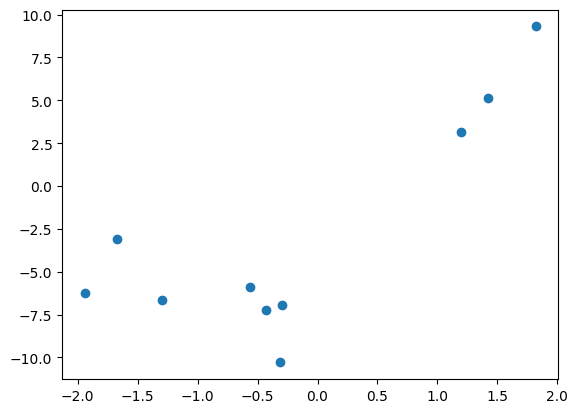

In [19]:
"""
Now let's generate some data.
"""

def gen_data(N):
    """Generates N data points"""
    X = np.random.uniform(-3, 3, size=N)
    Y = 3*X**2 + 4*X - 7 + np.random.normal(size=N)*2
    return np.expand_dims(X, 1), Y

X, Y = gen_data(10)
plt.scatter(X[:,0], Y)

In [20]:
X

array([[ 1.41772139],
       [-1.94190002],
       [-0.31051536],
       [-0.29420106],
       [ 1.8182176 ],
       [-1.66901284],
       [ 1.20011525],
       [-0.56018335],
       [-1.30031749],
       [-0.43047254]])

In [21]:
# This is how training data looks like (pairs of input and expected output)
list(zip(X, Y))

[(array([1.41772139]), 5.103930724166676),
 (array([-1.94190002]), -6.229532904935658),
 (array([-0.31051536]), -10.295278774556625),
 (array([-0.29420106]), -6.941879229717531),
 (array([1.8182176]), 9.303676960286802),
 (array([-1.66901284]), -3.063844663432012),
 (array([1.20011525]), 3.13339794600119),
 (array([-0.56018335]), -5.879755232589304),
 (array([-1.30031749]), -6.634696607783446),
 (array([-0.43047254]), -7.239989837878786)]

train_error 14.154994900173358


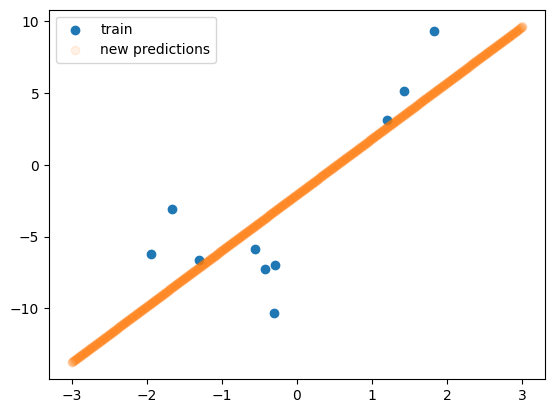

In [22]:
"""Fit the linear model and check the train error, predict for new datapoints"""
clf = LinearRegression()
clf.fit(X, Y)

X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

new_predictions = clf.predict(X_new)

plt.scatter(X, Y, label="train")
plt.scatter(X_new, new_predictions, alpha=0.1, label="new predictions")
plt.legend()

train_error = np.mean((clf.predict(X) - Y)**2)
print("train_error", train_error)

train_error 2.4635427919415243


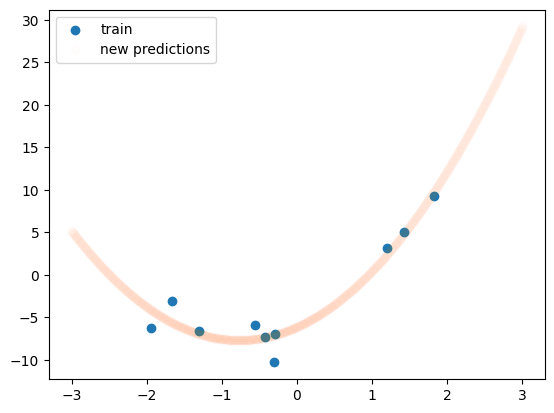

In [23]:
"""Now quadratic model and check the error, predict new"""
quad_features = PolynomialFeatures(2, include_bias=False)

X_quad = quad_features.fit_transform(X)

clf = LinearRegression()
clf.fit(X_quad, Y)

X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

new_predictions = clf.predict(quad_features.transform(X_new))

plt.scatter(X, Y, label="train")
plt.scatter(X_new, new_predictions, alpha=0.01, label="new predictions")
plt.legend()

train_error = np.mean((clf.predict(X_quad) - Y)**2)
print("train_error", train_error)

degree 3


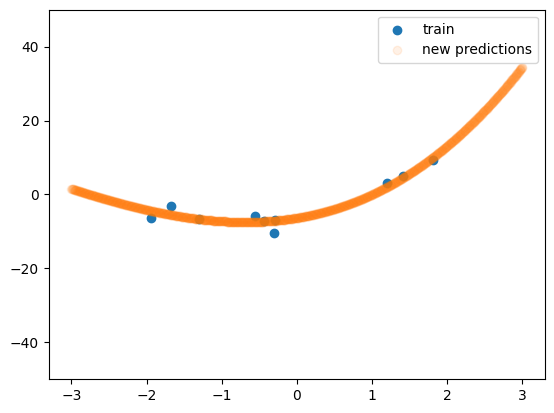

train_error 2.406506347998376
------------------------
degree 4


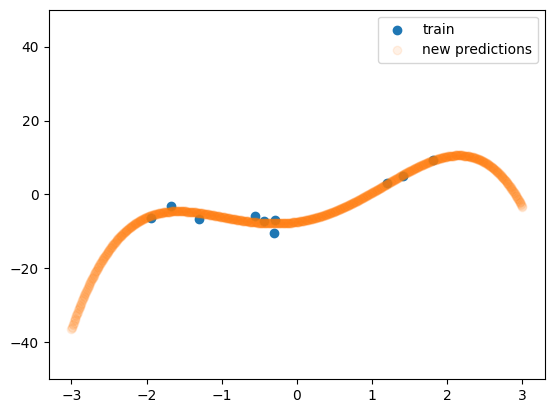

train_error 1.5269795653314526
------------------------
degree 5


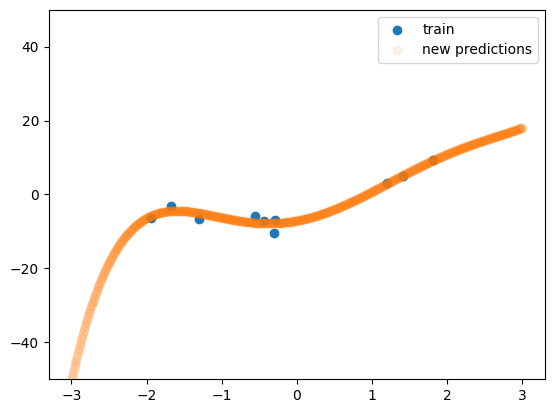

train_error 1.5198111652840147
------------------------
degree 6


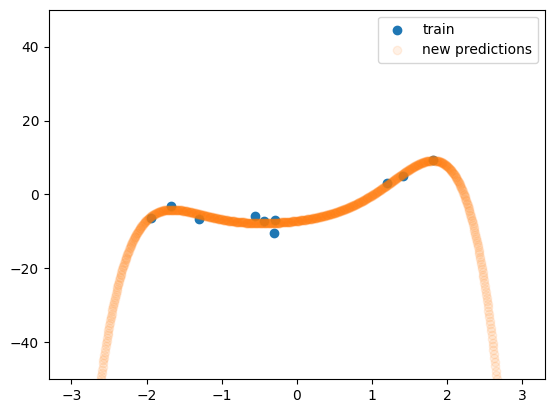

train_error 1.4586405519897405
------------------------
degree 7


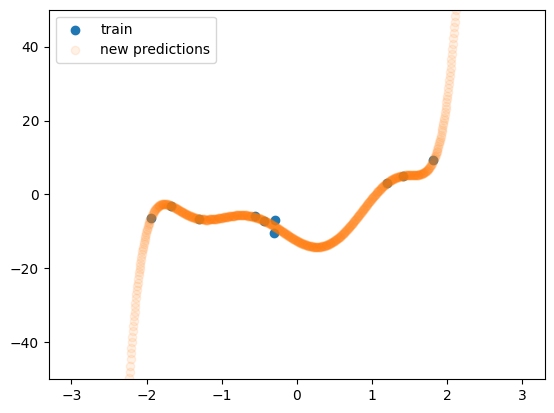

train_error 0.6405117372922874
------------------------
degree 8


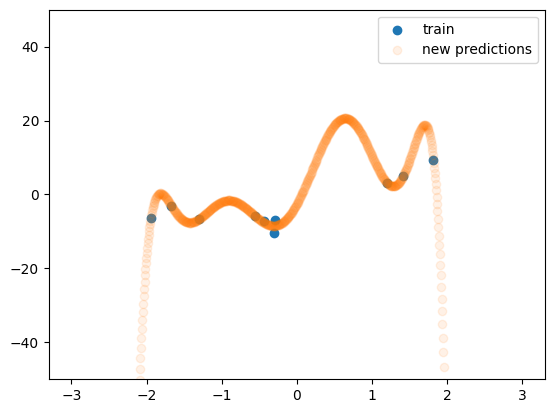

train_error 0.5874178674244147
------------------------
degree 9


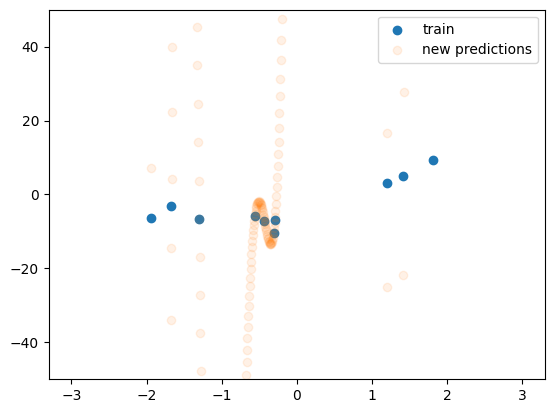

train_error 1.590564552517063e-21
------------------------


In [24]:
"""Now higher degree models"""
for degree in range(3, 10):
    print("degree", degree)
    poly_features = PolynomialFeatures(degree, include_bias=False)

    X_poly = poly_features.fit_transform(X)

    clf = LinearRegression()
    clf.fit(X_poly, Y)

    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

    new_predictions = clf.predict(poly_features.transform(X_new))

    plt.scatter(X, Y, label="train")
    plt.scatter(X_new, new_predictions, alpha=0.1, label="new predictions")
    plt.legend()
    plt.ylim(-50, 50)
    plt.show()

    train_error = np.mean((clf.predict(X_poly) - Y)**2)
    print("train_error", train_error)
    print("------------------------")

In [25]:
_= """
Models with higher degrees of polynomes have smaller training errors.
But they predict nonsense.
This is called overfit, we fitted not only relavent stuff from data, but also noise.
Overfited models are useless for prediction on new data.
"""

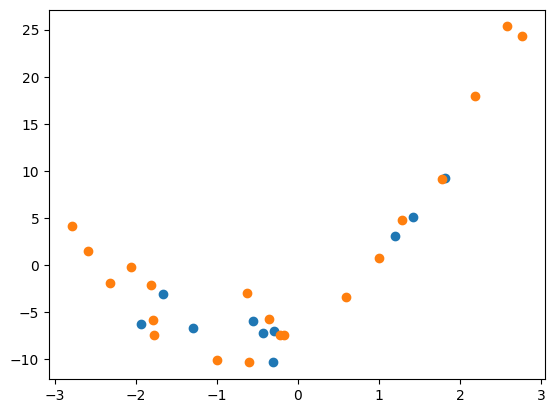

In [26]:
"What we care is about error on new data. Let's have some new data."

X2, Y2 = gen_data(20)
plt.scatter(X, Y)
plt.scatter(X2, Y2)

degree 1


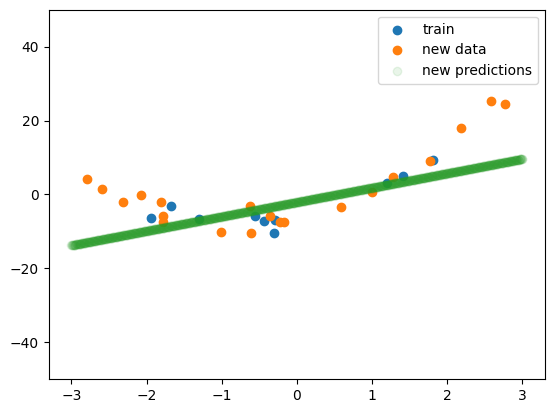

train_error 14.154994900173358 error on new data 76.81958518441476
------------------------
degree 2


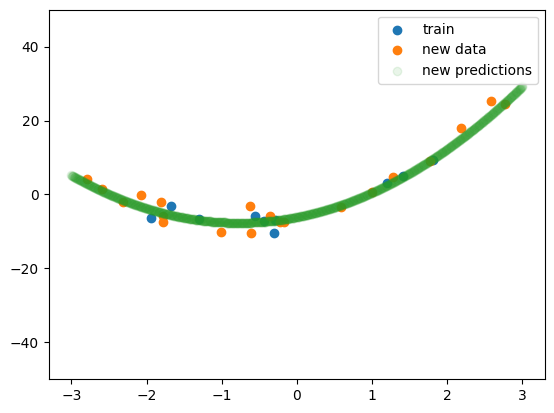

train_error 2.4635427919415243 error on new data 4.439129977518085
------------------------
degree 3


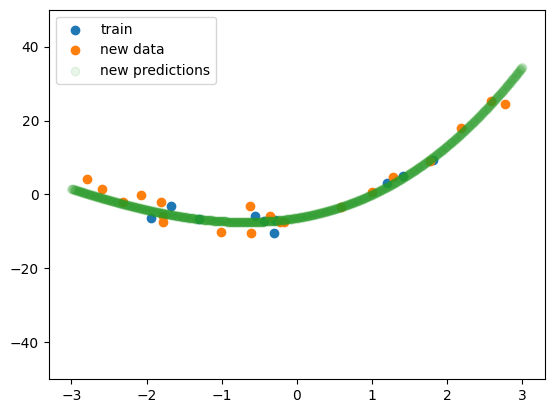

train_error 2.406506347998376 error on new data 5.689010307171127
------------------------
degree 4


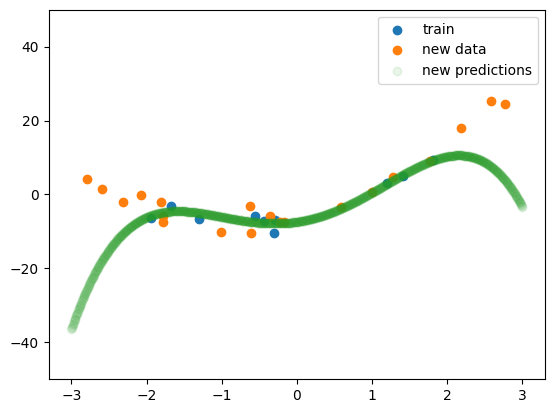

train_error 1.5269795653314526 error on new data 112.62055830706147
------------------------
degree 5


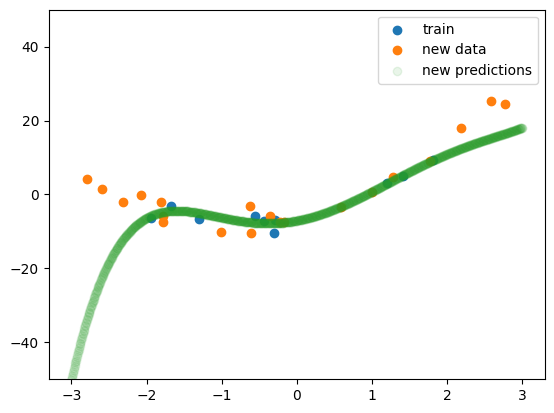

train_error 1.5198111652840147 error on new data 122.74013512723529
------------------------
degree 6


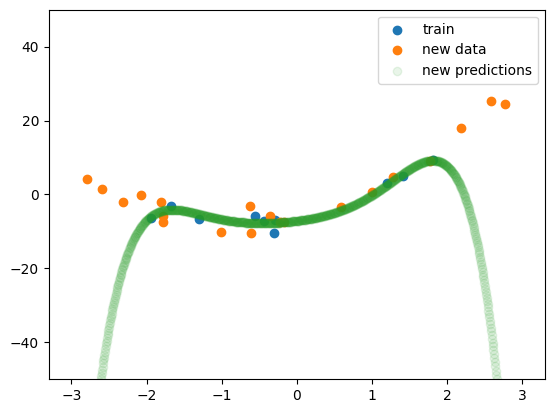

train_error 1.4586405519897405 error on new data 1239.2501230346627
------------------------
degree 7


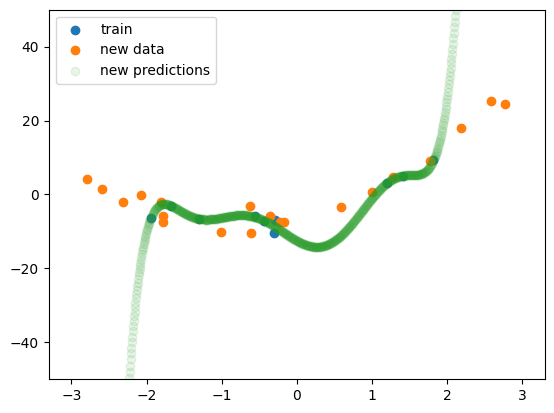

train_error 0.6405117372922874 error on new data 70595.24691508927
------------------------
degree 8


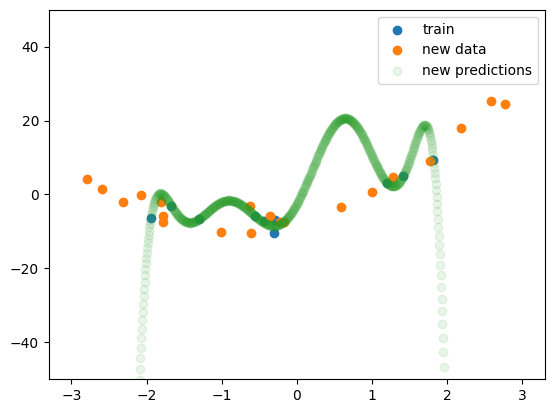

train_error 0.5874178674244147 error on new data 4062317.942117312
------------------------
degree 9


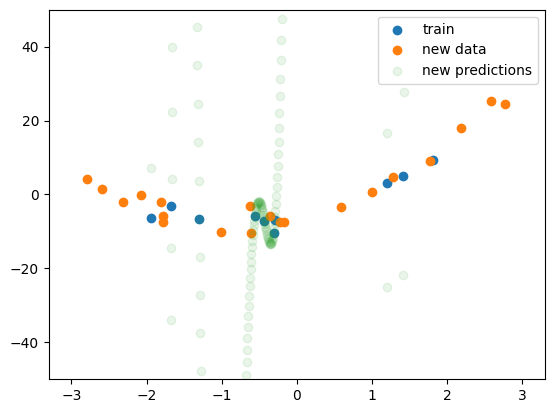

train_error 1.590564552517063e-21 error on new data 590931760355.0151
------------------------


In [28]:
"""Now let's do the same, but also check error on new data."""
train_errors = []
new_data_errors = []

for degree in range(1, 10):
    print("degree", degree)
    poly_features = PolynomialFeatures(degree, include_bias=False)

    X_poly = poly_features.fit_transform(X)

    clf = LinearRegression()
    clf.fit(X_poly, Y)

    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

    new_predictions = clf.predict(poly_features.transform(X_new))

    plt.scatter(X, Y, label="train")
    plt.scatter(X2, Y2, label="new data")
    plt.scatter(X_new, new_predictions, alpha=0.1, label="new predictions")
    plt.legend()
    plt.ylim(-50, 50)
    plt.show()

    train_error = np.mean((clf.predict(X_poly) - Y)**2)
    new_data_error = np.mean((clf.predict(poly_features.transform(X2)) - Y2)**2)
    print("train_error", train_error, "error on new data", new_data_error)
    print("------------------------")
    train_errors.append(train_error)
    new_data_errors.append(new_data_error)

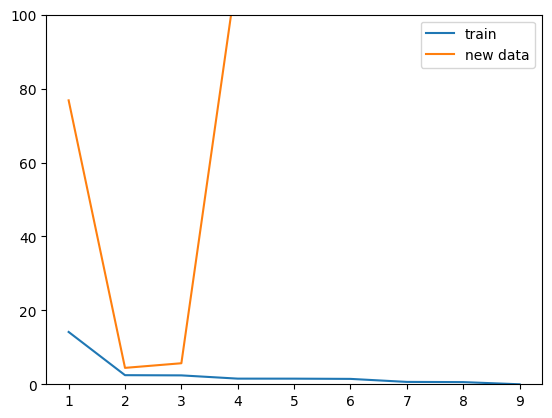

In [29]:
"""Let's plot errors vs degree"""
plt.plot(list(range(1, 10)), train_errors, label="train")
plt.plot(list(range(1, 10)), new_data_errors, label="new data")
plt.ylim(0, 100)
plt.legend()

In [30]:
_ = """
What we really want is that model works on the new data. Thus degree 2 in the best in current example.

In reality: Somebody gives you 10000s of data points.
You should build a model with them, but also pick the best model.
We will split data into 3 groups:
- train - this goes into fit function, X in case above
- valid - used to select best model and hyperparameters (i.e. degree of polynomial)
- test - to report final performance

How sizes affect things:
- Bigger train set - more precise model (model fits less noise)
- Bigger valid/test set - we can trust the error more, more precise evaluation
  - Rigorous error should be: (mean +- inter), bigger test set makes inter smaller
"""

degree 1


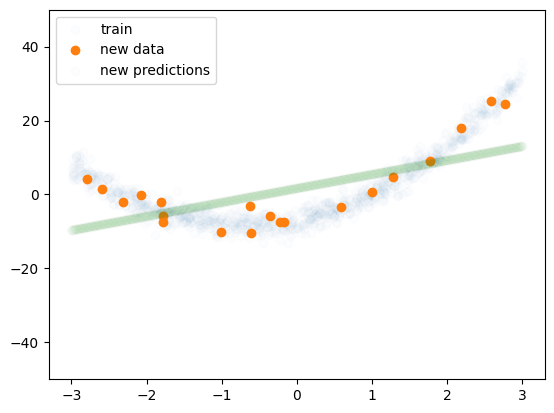

train_error 65.94460025537605 error on new data 57.93758464358471
------------------------
degree 2


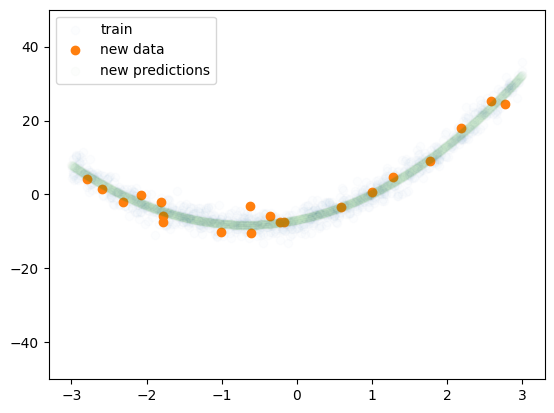

train_error 3.92815293621179 error on new data 4.219848879880707
------------------------
degree 3


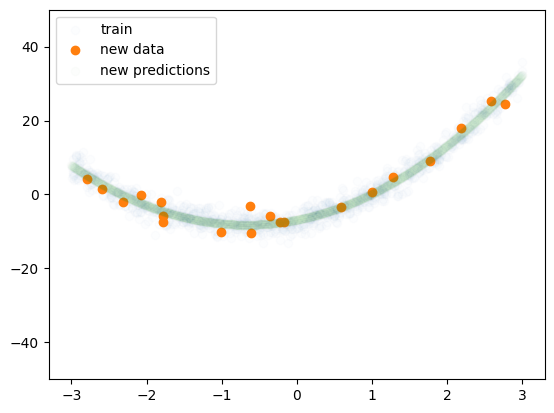

train_error 3.927402460401865 error on new data 4.226844640366076
------------------------
degree 4


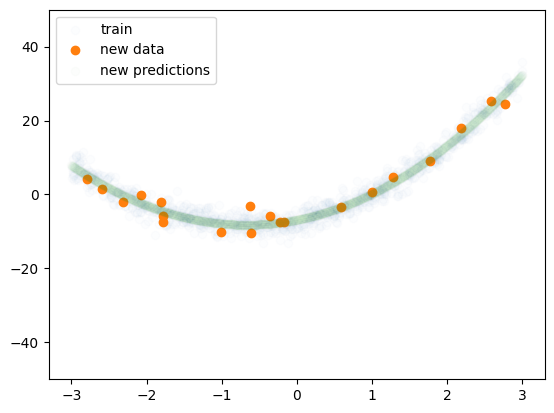

train_error 3.9273873462451854 error on new data 4.226299571666783
------------------------
degree 5


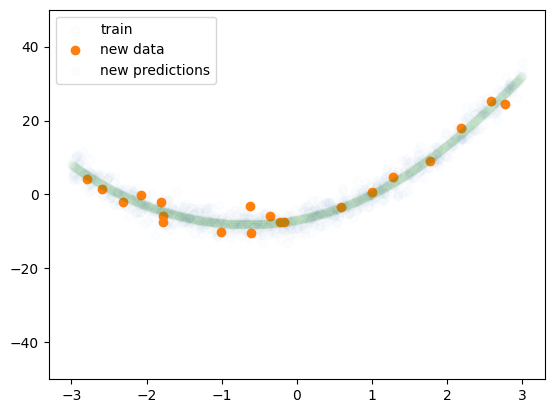

train_error 3.921336086406367 error on new data 4.173368230226012
------------------------
degree 6


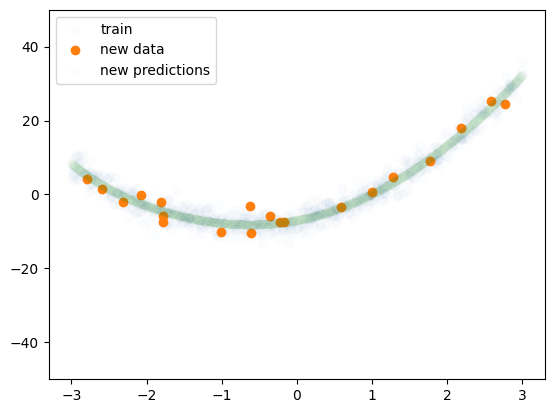

train_error 3.9141553654539254 error on new data 4.211765323663102
------------------------
degree 7


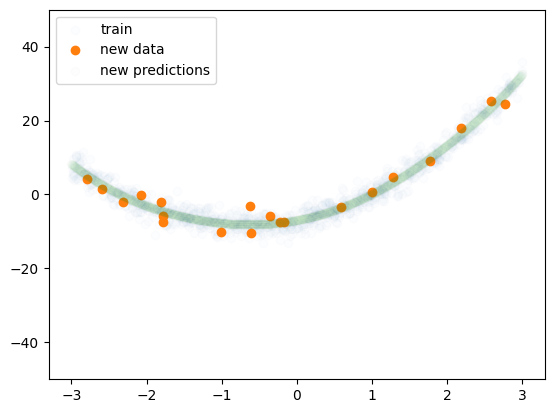

train_error 3.9129706261591966 error on new data 4.214045556381882
------------------------
degree 8


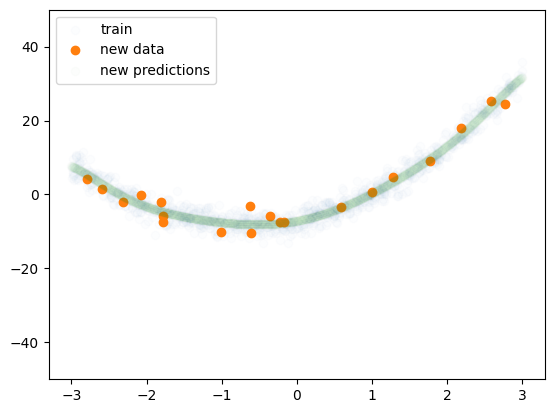

train_error 3.885837408099663 error on new data 4.375194654784818
------------------------
degree 9


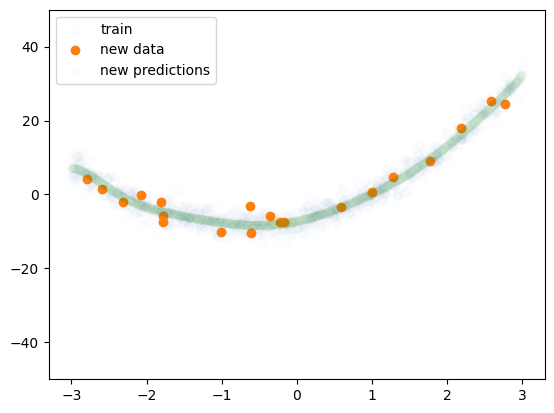

train_error 3.8645799971985726 error on new data 4.478812284302538
------------------------


In [32]:
"""Now let's do the same, but also check error on new data and have big train set."""
train_errors = []
new_data_errors = []
Xbig, Ybig = gen_data(1000)

for degree in range(1, 10):
    print("degree", degree)
    poly_features = PolynomialFeatures(degree, include_bias=False)

    X_poly = poly_features.fit_transform(Xbig)

    clf = LinearRegression()
    clf.fit(X_poly, Ybig)

    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

    new_predictions = clf.predict(poly_features.transform(X_new))

    plt.scatter(Xbig, Ybig, label="train", alpha=0.01)
    plt.scatter(X2, Y2, label="new data")
    plt.scatter(X_new, new_predictions, alpha=0.01, label="new predictions")
    plt.legend()
    plt.ylim(-50, 50)
    plt.show()

    train_error = np.mean((clf.predict(X_poly) - Ybig)**2)
    new_data_error = np.mean((clf.predict(poly_features.transform(X2)) - Y2)**2)
    print("train_error", train_error, "error on new data", new_data_error)
    print("------------------------")
    train_errors.append(train_error)
    new_data_errors.append(new_data_error)

degree 1


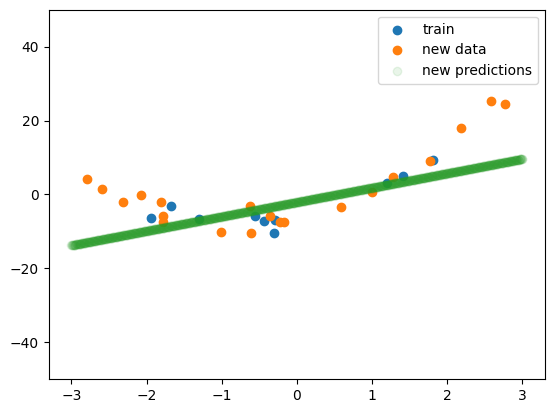

train_error on full data 14.154994900173358 error on new data 76.81958518441476 cross val error 21.544165405739232
------------------------
degree 2


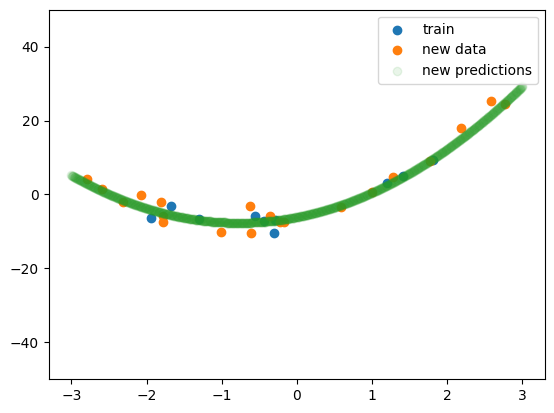

train_error on full data 2.4635427919415243 error on new data 4.439129977518085 cross val error 6.481619021862846
------------------------
degree 3


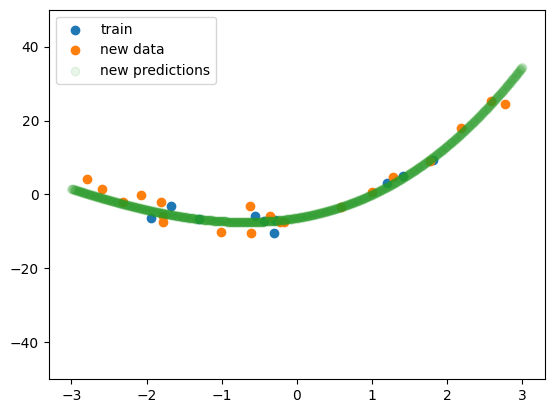

train_error on full data 2.406506347998376 error on new data 5.689010307171127 cross val error 10.313888416202612
------------------------
degree 4


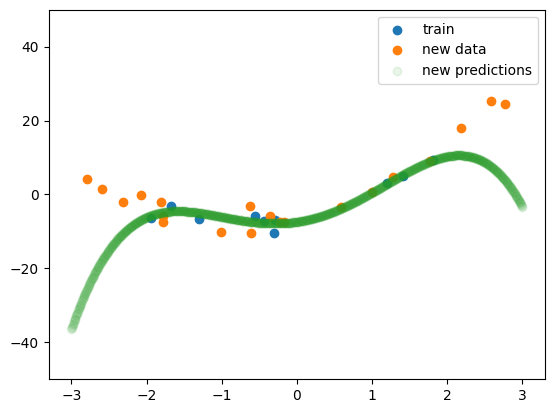

train_error on full data 1.5269795653314526 error on new data 112.62055830706147 cross val error 6.851636697242123
------------------------
degree 5


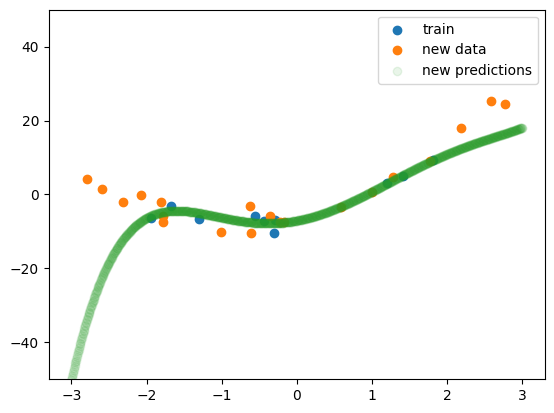

train_error on full data 1.5198111652840147 error on new data 122.74013512723529 cross val error 85.25494905696078
------------------------
degree 6


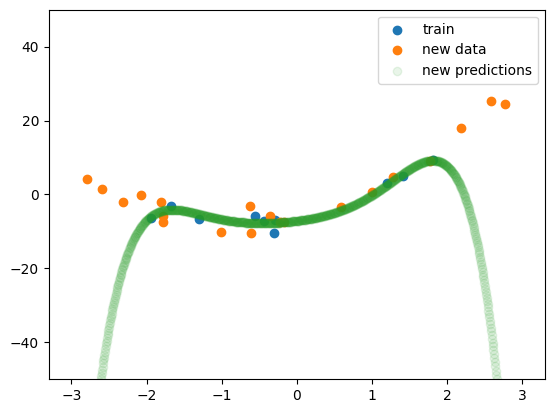

train_error on full data 1.4586405519897405 error on new data 1239.2501230346627 cross val error 2231.8130702505773
------------------------
degree 7


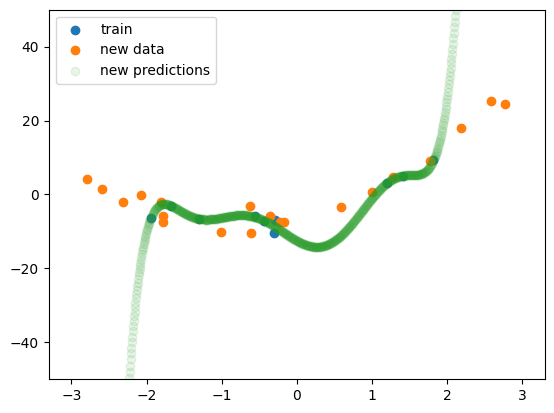

train_error on full data 0.6405117372922874 error on new data 70595.24691508927 cross val error 279930574.9929103
------------------------
degree 8


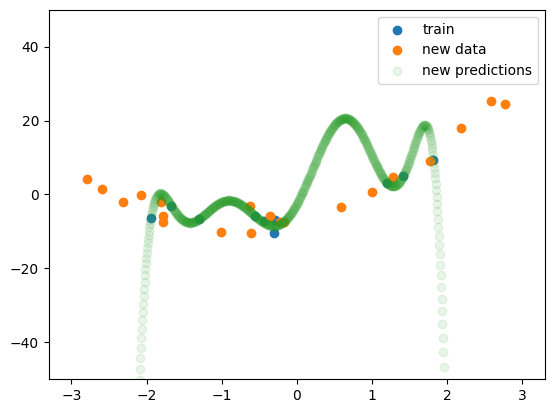

train_error on full data 0.5874178674244147 error on new data 4062317.942117312 cross val error 40540631.44879921
------------------------
degree 9


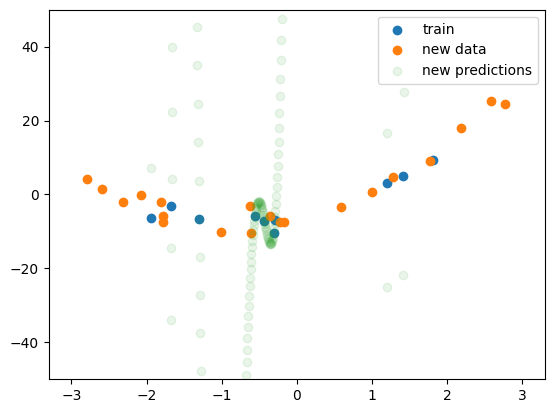

train_error on full data 1.590564552517063e-21 error on new data 590931760355.0151 cross val error 1124814137.3898911
------------------------


In [34]:
"""
One more problem.
What if we have very small dataset, e.g. 100 points.
After split we get:
 - train 80 samples
 - valid 10 samples
 - test 10 samples

This is bad.

This can be saved by crossvalidation, do train/test and instead of valid do crossvalidation as in
https://scikit-learn.org/stable/modules/cross_validation.html
Split data into K parts. Train K-times always evaluate on different part.
"""

"""Now let's do the same, but also check error on new data, and also cross val score"""
from sklearn.model_selection import cross_val_score

train_errors = []
new_data_errors = []

for degree in range(1, 10):
    print("degree", degree)
    poly_features = PolynomialFeatures(degree, include_bias=False)

    X_poly = poly_features.fit_transform(X)

    clf = LinearRegression()
    #clf.fit(X_poly, Y)
    score = cross_val_score(clf, X_poly, Y, cv=5, scoring="neg_mean_squared_error")

    clf.fit(X_poly, Y)
    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

    new_predictions = clf.predict(poly_features.transform(X_new))

    plt.scatter(X, Y, label="train")
    plt.scatter(X2, Y2, label="new data")
    plt.scatter(X_new, new_predictions, alpha=0.1, label="new predictions")
    plt.legend()
    plt.ylim(-50, 50)
    plt.show()

    train_error = np.mean((clf.predict(X_poly) - Y)**2)
    new_data_error = np.mean((clf.predict(poly_features.transform(X2)) - Y2)**2)
    print("train_error on full data", train_error, "error on new data", new_data_error, "cross val error", -np.mean(score))
    print("------------------------")
    train_errors.append(train_error)
    new_data_errors.append(new_data_error)

degree 1


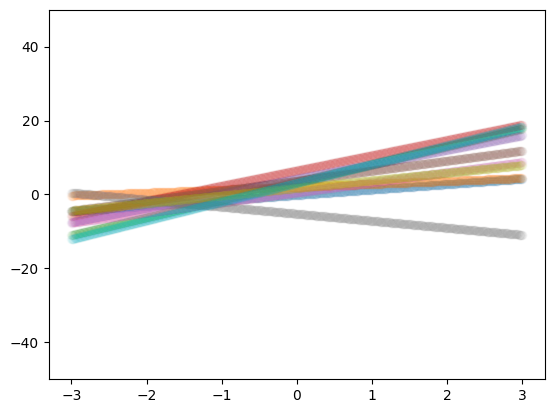

degree 2


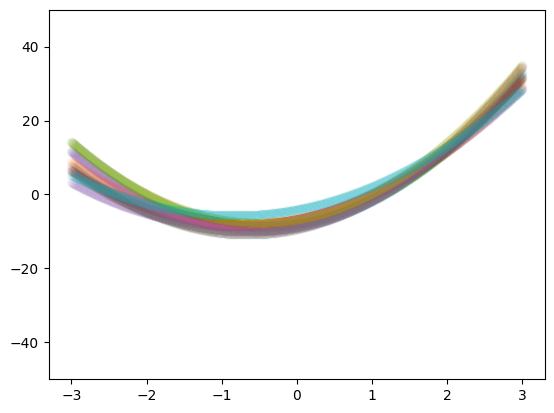

degree 4


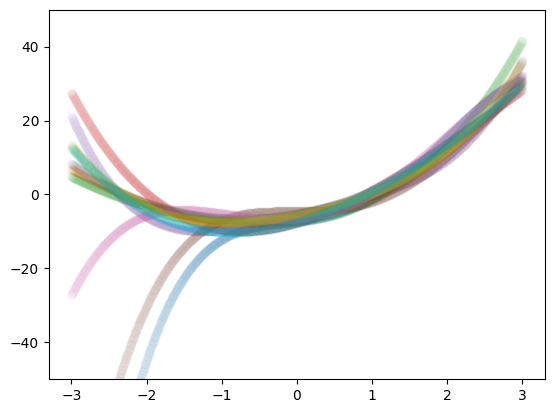

degree 9


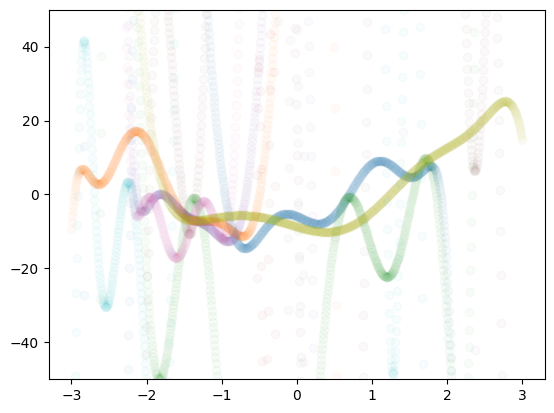

In [16]:
"""
Test error can be decompsoded into bias and variance:
Bias - what model cannot predict (e.g. linear model on quadratic data)
Variance - if I repeat training on new data, how different model I will get

Small degree - high bias, low variance
High degree - low bias, high variance
"""

"""Lets train 10 models on different data"""

for degree in [1, 2, 4, 9]:
    print("degree", degree)
    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)
    for _ in range(10):
        X, Y = gen_data(10)
        poly_features = PolynomialFeatures(degree, include_bias=False)

        X_poly = poly_features.fit_transform(X)

        clf = LinearRegression()
        clf.fit(X_poly, Y)

        new_predictions = clf.predict(poly_features.transform(X_new))

        #plt.scatter(X, Y, label="train")
        plt.scatter(X_new, new_predictions, alpha=0.03)

    plt.ylim(-50, 50)
    plt.show()